In [1]:
import numpy as np              # Одномерные и многомерные массивы (array)
import pandas as pd             # Таблицы и временные ряды (dataframe, series)
import matplotlib.pyplot as plt # Научная графика
import seaborn as sns           # Еще больше красивой графики для визуализации данных
import sklearn                  # Алгоритмы машинного обучения

# **Оценка стоимости квартиры**


# 1. Загружаем данные

Загружаем файл из интернета:

In [2]:
url = "https://raw.githubusercontent.com/NikolaiZolotykh/MachineLearningCourse/master/flats.csv"
data_raw = pd.read_csv(url)

Точно так же можно загрузить файл с локального диска, только вместо `url` надо указать путь. Однако если вы пользуетесь colab, то чтобы загрузить файл с локального диска придется поступить по-другому:

In [3]:
#from google.colab import files
#uploaded = files.upload()

In [4]:
#import io
#data_raw = pd.read_csv(io.BytesIO(uploaded['flats.csv']))

Таблица содержит данные о более 72 тысяч квартир, выставленных на продажу в г.Нижнем Новгороде в 2017 г. Для каждой квартиры указаны ее цена (в тыс. руб.), географические координаты, тип продажи (вторичка или новостройка), количество этажей, тип дома, количество комнат (0 - квартира-студия), номер этажа и общая площадь квартиры (в кв.м).

Вначале посмотрим на размеры таблицы: количество строк (каждая строка соответствует одной квартире) и количество столбцов (каждый столбец соответствует конкретному признаку):

In [5]:
data_raw.shape

(72379, 10)

In [6]:
data_raw

,Price,Date,Lat,Lng,Type,Floors,Building,Rooms,Floor,Area
0,3500.000,240,56.365696,43.820250,Resale,9.0,Brick,3.0,4.0,60.0
1,4000.000,240,56.323057,44.007862,Resale,3.0,Brick,3.0,3.0,57.0
2,2150.000,240,56.267552,43.892107,Resale,5.0,Panel,2.0,1.0,38.0
3,3100.000,240,56.359963,43.813756,Resale,5.0,Panel,4.0,2.0,59.0
4,3585.000,240,56.325374,43.937463,Resale,9.0,Panel,2.0,7.0,52.5
...,...,...,...,...,...,...,...,...,...,...
72374,3250.000,372,56.282006,44.085056,Resale,14.0,Monolithic,1.0,1.0,44.7
72375,2824.800,371,56.348480,43.873340,Resale,17.0,Brick,1.0,3.0,42.8
72376,3316.125,371,56.300964,43.951468,New,25.0,Monolithic,2.0,5.0,55.5
72377,13600.000,371,56.329327,44.014997,Resale,5.0,Brick,3.0,4.0,81.9


Метод `data_raw.head()` отображает первые строки (по умолчанию, 5 строк) таблицы

In [7]:
data_raw.head(15)

,Price,Date,Lat,Lng,Type,Floors,Building,Rooms,Floor,Area
0,3500.0,240,56.365696,43.820250,Resale,9.0,Brick,3.0,4.0,60.0
1,4000.0,240,56.323057,44.007862,Resale,3.0,Brick,3.0,3.0,57.0
2,2150.0,240,56.267552,43.892107,Resale,5.0,Panel,2.0,1.0,38.0
3,3100.0,240,56.359963,43.813756,Resale,5.0,Panel,4.0,2.0,59.0
4,3585.0,240,56.325374,43.937463,Resale,9.0,Panel,2.0,7.0,52.5
5,2380.0,240,56.368027,43.818317,Resale,9.0,Brick,2.0,7.0,46.0
6,38500.0,240,56.317963,44.063230,Resale,25.0,Brick,5.0,22.0,313.0
7,1500.0,241,56.346896,43.802428,Resale,5.0,Panel,1.0,2.0,28.0
8,1669.0,240,56.283915,44.082083,New,7.0,Block,1.0,5.0,33.0
9,3800.0,240,56.366988,43.809653,New,14.0,Monolithic,2.0,2.0,73.0


А вот последние строки:

In [8]:
data_raw.tail()

,Price,Date,Lat,Lng,Type,Floors,Building,Rooms,Floor,Area
72374,3250.000,372,56.282006,44.085056,Resale,14.0,Monolithic,1.0,1.0,44.7
72375,2824.800,371,56.348480,43.873340,Resale,17.0,Brick,1.0,3.0,42.8
72376,3316.125,371,56.300964,43.951468,New,25.0,Monolithic,2.0,5.0,55.5
72377,13600.000,371,56.329327,44.014997,Resale,5.0,Brick,3.0,4.0,81.9
72378,1490.000,372,56.323293,43.868697,Resale,2.0,Brick,2.0,2.0,46.0


In [9]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72379 entries, 0 to 72378
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Price     72379 non-null  float64
 1   Date      72379 non-null  int64  
 2   Lat       72379 non-null  float64
 3   Lng       72379 non-null  float64
 4   Type      72362 non-null  object 
 5   Floors    72362 non-null  float64
 6   Building  72362 non-null  object 
 7   Rooms     72362 non-null  float64
 8   Floor     72362 non-null  float64
 9   Area      72362 non-null  float64
dtypes: float64(7), int64(1), object(2)
memory usage: 5.5+ MB


Мы видим, что столбцы (признаки) имеют имена

- `Price` - цена (в тыс. руб.)
- `Date` - номер дня, в который квартира была выставлена на продажу
- `Lat` - географическая широта объекта
- `Lng` - географическая долгота объекта
- `Type` - тип продажи (`'Resale'` - вторичка, `'New'` - новостройка)
- `Floors` - количество этажей в доме
- `Building` - тип строения (`'Brick'`, `'Panel'`, `'Monolithic'`, `'Block'`, `'Wooden'`)
- `Rooms` - количество комнат в квартире (0 - квартира-студия)
- `Floor` - номер этажа
- `Area` - общая площадь квартиры (в кв.м)

Признак `Building` - номинальный (категориальный), `Type` - бинарный, остальные признаки (включая целевой признак `Price`) - количественный (числовой).

Требуется предсказать количественный признак `Price` по остальным признакам. Это *задача восстановления регрессии*.

Типы признаков:

- Качественные (*категориальные*, *факторные*):
  - Неупорядоченные (*номинальные*)
  - Упорядоченные (*порядковые*)
- Количественные (*числовые*):
  - *Непрерывные*
  - *Дискретные*

*Бинарные* признаки (которые принимают только два значения) можно считать и номинальными, и порядковыми, и дискретными    

Столбцы `'Building'` и `'Type'` содержат категориальные значения. Пока они имеют тип `'Object`'. Заменим тип на специальный, предназначенный для хранения категориальных значений:

In [10]:
data_raw['Type'] = data_raw['Type'].astype('category')
data_raw['Building'] = data_raw['Building'].astype('category')

In [11]:
data_raw['Type'].dtype

CategoricalDtype(categories=['New', 'Resale'], ordered=False)

In [12]:
data_raw['Building'].dtype

CategoricalDtype(categories=['Block', 'Brick', 'Monolithic', 'Panel', 'Wooden'], ordered=False)

Информация о числовых признаках:

In [13]:
data_raw.describe()

,Price,Date,Lat,Lng,Floors,Rooms,Floor,Area
count,7.237900e+04,72379.000000,72379.000000,72379.000000,72362.000000,72362.000000,72362.000000,72362.000000
mean,3.441483e+03,264.179734,56.295150,43.935564,9.373967,1.952848,5.175728,53.323833
std,9.067804e+03,87.866132,0.045418,0.082768,5.139369,0.930402,3.884019,31.438198
min,1.000000e-03,56.000000,54.862751,41.806470,1.000000,0.000000,1.000000,1.000000
25%,2.200000e+03,189.000000,56.265067,43.868633,5.000000,1.000000,2.000000,37.000000
50%,2.850000e+03,294.000000,56.300760,43.932064,9.000000,2.000000,4.000000,46.000000
75%,3.860000e+03,344.000000,56.325305,44.005985,12.000000,3.000000,7.000000,63.000000
max,2.300000e+06,372.000000,57.127867,44.485489,25.000000,6.000000,25.000000,5039.000000


Информация о категориальных признаках

In [14]:
data_raw.describe(include=['category'])

,Type,Building
count,72362,72362
unique,2,5
top,Resale,Brick
freq,64165,53263


Имена столбцов (признаков) можно получить таким образом:

In [15]:
data_raw.columns

Index(['Price', 'Date', 'Lat', 'Lng', 'Type', 'Floors', 'Building', 'Rooms',
       'Floor', 'Area'],
      dtype='object')

Имена строк (совпадают с номерами):

In [16]:
data_raw.index

RangeIndex(start=0, stop=72379, step=1)

Столбцы `'Building'` и `'Type'` содержат категориальные значения. Пока они имеют тип `'Object`'. Заменим тип на специальный, предназначенный для хранения категориальных значений:

In [17]:
data_raw['Building']

0             Brick
1             Brick
2             Panel
3             Panel
4             Panel
            ...    
72374    Monolithic
72375         Brick
72376    Monolithic
72377         Brick
72378         Brick
Name: Building, Length: 72379, dtype: category
Categories (5, object): ['Block', 'Brick', 'Monolithic', 'Panel', 'Wooden']

Pandas реализует 2 основных класса: `Series`, `DataFrame`

In [18]:
data_raw['Building'].dtype

CategoricalDtype(categories=['Block', 'Brick', 'Monolithic', 'Panel', 'Wooden'], ordered=False)

## Пропущенные значения:

In [26]:
data_raw.isnull().sum()

Price        0
Date         0
Lat          0
Lng          0
Type        17
Floors      17
Building    17
Rooms       17
Floor       17
Area        17
dtype: int64

In [27]:
[feature for feature in data_raw.columns if data_raw[feature].isnull().sum() > 1]

['Type', 'Floors', 'Building', 'Rooms', 'Floor', 'Area']

Строки с пропущенными значеними можно удалить (так как их немного):

In [28]:
#data_raw = data_raw.dropna()

Более продвинутый метод - заменить пропущенные значения для числовых признаков - медианами, а для категориальных - модами. Еще можно добавить новый признак - индикатор пропущенного значения. 

In [29]:
feat = ['Floors', 'Rooms', 'Floor', 'Area']
data_raw[feat].median(axis = 0)

Floors     9.0
Rooms      2.0
Floor      4.0
Area      46.0
dtype: float64

In [30]:
data_raw[feat] = data_raw[feat].fillna(data_raw[feat].median(axis = 0), axis=0)

In [31]:
data_raw.isna().sum()  

Price        0
Date         0
Lat          0
Lng          0
Type        17
Floors       0
Building    17
Rooms        0
Floor        0
Area         0
dtype: int64

Категориальные пропущенные значения можно заменить модой. Еще можно ввести новый признак - индикатор пропущенного значения (легко сделать при бинаризации ниже).

In [32]:
data_raw['Building'].fillna(data_raw['Building'].mode().iloc[0], inplace=True)
data_raw['Type'    ].fillna(data_raw['Type'    ].mode().iloc[0], inplace=True)

In [33]:
data_raw['Building'].mode()

0    Brick
Name: Building, dtype: category
Categories (5, object): ['Block', 'Brick', 'Monolithic', 'Panel', 'Wooden']

In [34]:
data_raw.isna().sum()  

Price       0
Date        0
Lat         0
Lng         0
Type        0
Floors      0
Building    0
Rooms       0
Floor       0
Area        0
dtype: int64

In [35]:
data_raw.describe()

,Price,Date,Lat,Lng,Floors,Rooms,Floor,Area
count,7.237900e+04,72379.000000,72379.000000,72379.000000,72379.000000,72379.000000,72379.000000,72379.000000
mean,3.441483e+03,264.179734,56.295150,43.935564,9.373879,1.952859,5.175451,53.322113
std,9.067804e+03,87.866132,0.045418,0.082768,5.138768,0.930293,3.883605,31.434706
min,1.000000e-03,56.000000,54.862751,41.806470,1.000000,0.000000,1.000000,1.000000
25%,2.200000e+03,189.000000,56.265067,43.868633,5.000000,1.000000,2.000000,37.000000
50%,2.850000e+03,294.000000,56.300760,43.932064,9.000000,2.000000,4.000000,46.000000
75%,3.860000e+03,344.000000,56.325305,44.005985,12.000000,3.000000,7.000000,63.000000
max,2.300000e+06,372.000000,57.127867,44.485489,25.000000,6.000000,25.000000,5039.000000


In [36]:
data_raw.describe(include=['category'])

,Type,Building
count,72379,72379
unique,2,5
top,Resale,Brick
freq,64182,53280


## 2. Визуализируем, анализируем, боремся с выбросами (outliers)

Понятно, что цена квартиры в первую очередь зависит от ее площади.
Построим поэтому диаграмму рассеивания для двух признаков: `Price` и `Area`.


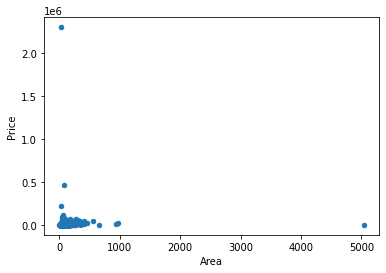

In [37]:
data_raw.plot(kind='scatter', x='Area', y='Price')
pass

Можно вот так:

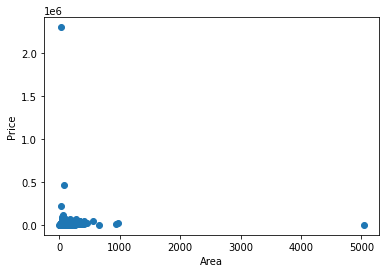

In [38]:
plt.scatter(data_raw['Area'], data_raw['Price'])
plt.xlabel('Area')
plt.ylabel('Price')
pass

Все диаграммы рассеивания:

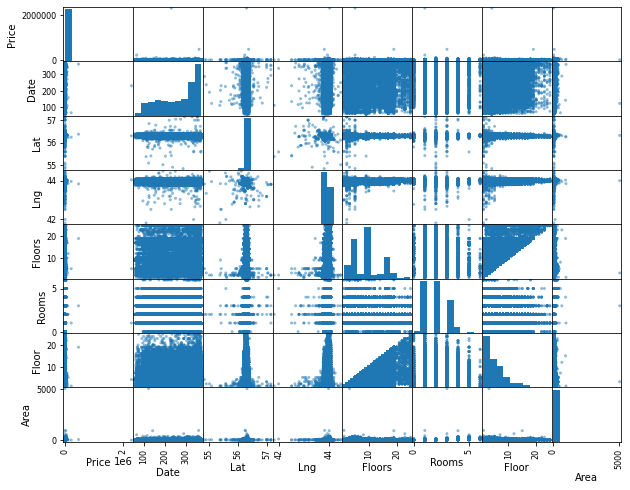

In [39]:
pd.plotting.scatter_matrix(data_raw, figsize = (10, 8))
pass

In [40]:
data_raw[data_raw['Price'] > 50000]

,Price,Date,Lat,Lng,Type,Floors,Building,Rooms,Floor,Area
2848,63504.300,246,56.312300,43.997154,Resale,5.0,Brick,5.0,3.0,280.00
4832,216000.016,65,56.234177,43.956104,Resale,5.0,Brick,1.0,1.0,32.00
7057,111111.112,158,56.218230,43.841084,Resale,12.0,Brick,2.0,5.0,59.00
7303,50160.000,177,56.324755,43.999411,Resale,5.0,Brick,5.0,4.0,330.00
12050,53782.008,93,56.347450,43.932440,Resale,5.0,Brick,2.0,4.0,72.70
12453,68000.000,146,56.318086,43.985478,Resale,2.0,Wooden,2.0,1.0,52.00
13171,51000.000,340,56.324755,43.999429,New,5.0,Monolithic,5.0,4.0,320.40
18618,75000.000,109,56.320168,43.996975,Resale,5.0,Brick,2.0,1.0,85.00
32985,52800.000,234,56.324755,43.999411,Resale,5.0,Brick,5.0,5.0,264.00
35226,59000.000,208,56.346996,43.874435,New,17.0,Brick,3.0,14.0,91.00


In [41]:
data_raw[data_raw['Area'] > 300]

,Price,Date,Lat,Lng,Type,Floors,Building,Rooms,Floor,Area
6,38500.000,240,56.317963,44.063230,Resale,25.0,Brick,5.0,22.0,313.0
215,14000.000,242,56.313503,44.037670,Resale,4.0,Brick,5.0,3.0,350.0
366,18000.000,306,56.308995,43.978237,Resale,10.0,Brick,4.0,9.0,303.0
962,30900.000,298,56.324391,44.020566,Resale,5.0,Brick,5.0,5.0,315.0
5550,16900.000,194,56.321271,44.005277,Resale,7.0,Brick,4.0,3.0,320.0
6596,49500.000,65,56.329037,44.014797,Resale,8.0,Brick,5.0,7.0,549.0
6948,14500.000,169,56.313503,44.037670,Resale,4.0,Brick,5.0,3.0,350.0
7303,50160.000,177,56.324755,43.999411,Resale,5.0,Brick,5.0,4.0,330.0
7898,28000.000,115,56.344627,43.865555,Resale,5.0,Brick,1.0,1.0,462.8
8943,5508.240,141,56.263612,44.021545,Resale,19.0,Monolithic,4.0,15.0,938.0


Мы видим, что на диаграмме рассеивания `Price`-`Area` основная масса точек сгрудилась в левом нижнем углу. Какие-то точки соответствуют квартирам с чрезмерно большими значениями цены или площади. Например, более $2$ млрд. руб. или $5$ тыс м. Это *выбросы* (*outliers*) - объекты, значения признаков которых сильно отличаются от признаков основной массы объектов, сильно выпадающих из общей картины. Возможно, это ошибки в данных. В любом случае выбросы, как правило, мешают построить хорошее решающее правило и их рекомендуется выбрасывать.

Для обнаружения выбросов найдем, например, квантили для признаков `Price` и `Area`:

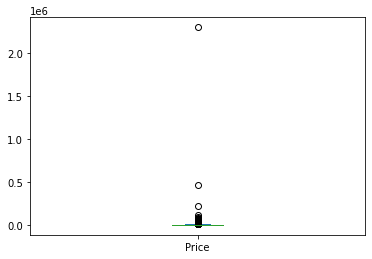

In [42]:
data_raw['Price'].plot(kind='box')
pass

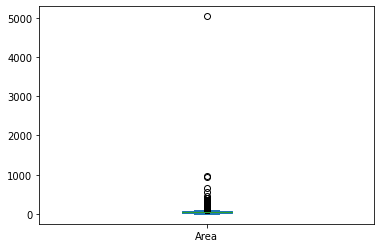

In [43]:
data_raw['Area'].plot(kind='box')
pass

In [44]:
data_raw['Price'].quantile([0.005,.01,.05,.1,.5,.9,.95,.99,.995])

0.005      800.0
0.010     1000.0
0.050     1500.0
0.100     1700.0
0.500     2850.0
0.900     5500.0
0.950     7000.0
0.990    12000.0
0.995    14900.0
Name: Price, dtype: float64

Мы видим, например, что $99\%$ всех значений признака `'Price'` находится в диапазоне от $800$ до $14900$ тыс. руб. (это значения квантилей, соответствующих уровням $0.005$ и $0.995$ соответственно)

In [45]:
data_raw['Area'].quantile([0.005,.01,.05,.1,.5,.9,.95,.99,.995])

0.005     18.0
0.010     19.0
0.050     29.0
0.100     31.0
0.500     46.0
0.900     80.0
0.950     94.0
0.990    150.0
0.995    162.0
Name: Area, dtype: float64

$99\%$ всех значений `'Area'` находится в диапазоне от $18$ до $162$ кв. м. 

Удалим все строки таблицы, в которых `'Price'` или `'Area'` выходят за пределы квантилей $0.005$, $0.995$.

In [46]:
rows_to_drop = data_raw[
    (data_raw['Price'] < data_raw['Price'].quantile(0.005)) | (data_raw['Price'] > data_raw['Price'].quantile(0.995)) | 
    (data_raw['Area']  < data_raw['Area' ].quantile(0.005)) | (data_raw['Area']  > data_raw['Area' ].quantile(0.995))].index
data = data_raw.drop(rows_to_drop)
data.shape

(71265, 10)

In [47]:
#Другой способ:
data = data_raw[
    (data_raw['Price'] >= data_raw['Price'].quantile(0.005)) & (data_raw['Price'] <= data_raw['Price'].quantile(0.995)) & 
    (data_raw['Area']  >= data_raw['Area' ].quantile(0.005)) & (data_raw['Area']  <= data_raw['Area' ].quantile(0.995))]
data.shape

(71265, 10)

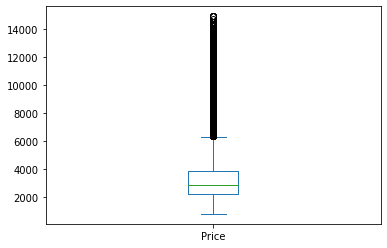

In [48]:
data['Price'].plot(kind='box')
pass

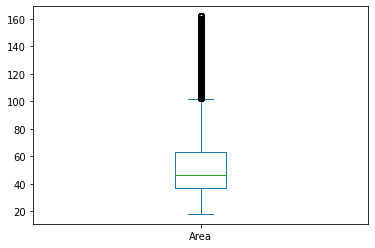

In [49]:
data['Area'].plot(kind='box')
pass

Другой способ обнаружения выбросов. Можно воспользоваться эвристическим правилом, что все примеры за границами интервала $[Q_1-1.5\cdot{\rm IQR},\, Q_3+1.5\cdot{\rm IQR}]$ являются выбросами.

In [50]:
Q1, Q3 = data_raw['Price'].quantile([.25, .75])
IQR = Q3 - Q1
price_lower = Q1 - 1.5*IQR
price_upper = Q3 + 1.5*IQR

In [51]:
Q1, Q3 = data_raw['Area'].quantile([.25, .75])
IQR = Q3 - Q1
area_lower = Q1 - 1.5*IQR
area_upper = Q3 + 1.5*IQR

In [52]:
rows_to_drop = data_raw[
    (data_raw['Price'] < price_lower) | (data_raw['Price'] > price_upper) | 
    (data_raw['Area']  < area_lower)  | (data_raw['Area']  > area_upper)].index
data = data_raw.drop(rows_to_drop)
data.shape


(67304, 10)

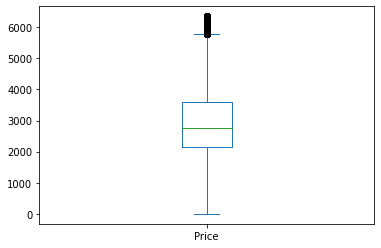

In [53]:
data['Price'].plot(kind='box')
pass

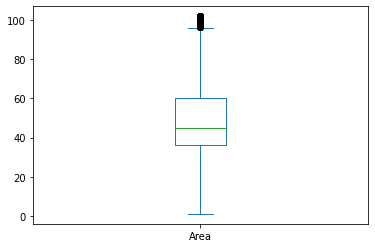

In [54]:
data['Area'].plot(kind='box')
pass

In [55]:
data.describe()

,Price,Date,Lat,Lng,Floors,Rooms,Floor,Area
count,67304.000000,67304.000000,67304.000000,67304.000000,67304.000000,67304.000000,67304.000000,67304.000000
mean,2959.783053,264.045138,56.293807,43.931640,9.184863,1.853144,5.067648,48.768746
std,1130.690763,87.861529,0.046231,0.082304,5.073734,0.851991,3.834962,16.085462
min,0.001000,56.000000,54.862751,41.806470,1.000000,0.000000,1.000000,1.000000
25%,2149.999000,189.000000,56.264057,43.866577,5.000000,1.000000,2.000000,36.000000
50%,2750.000000,293.000000,56.296784,43.928345,9.000000,2.000000,4.000000,45.000000
75%,3600.000000,344.000000,56.325595,44.001888,10.000000,2.000000,7.000000,60.000000
max,6350.000000,372.000000,57.127867,44.485489,25.000000,6.000000,25.000000,102.000000


In [56]:
data.describe(include=['category'])

,Type,Building
count,67304,67304
unique,2,5
top,Resale,Brick
freq,60377,48806


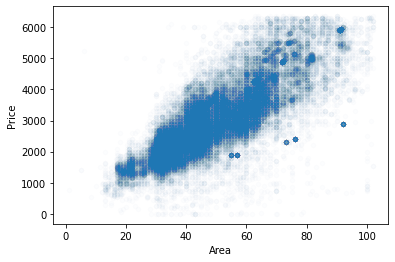

In [57]:
data.plot(kind = 'scatter', x = 'Area', y = 'Price', alpha=.01)
pass

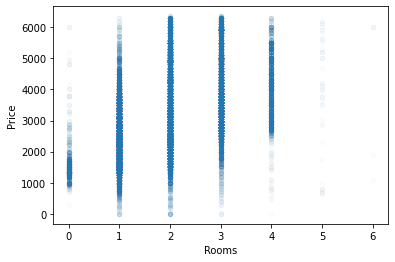

In [58]:
data.plot(kind = 'scatter', x = 'Rooms', y = 'Price', alpha=0.02)
pass

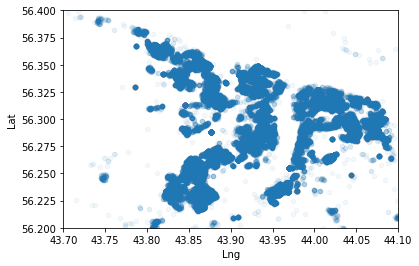

In [59]:
data.plot(kind = 'scatter', x = 'Lng', y = 'Lat', alpha=0.05)
#plt.scatter(data['Lng'], data['Lat'], alpha=0.01)
plt.xlim([43.7, 44.1])
plt.ylim([56.2, 56.4])
pass

Интересно посмотреть, сколько раз номинальные переменные принимают то или иное значение

In [60]:
data['Type'].value_counts() 

Resale    60377
New        6927
Name: Type, dtype: int64

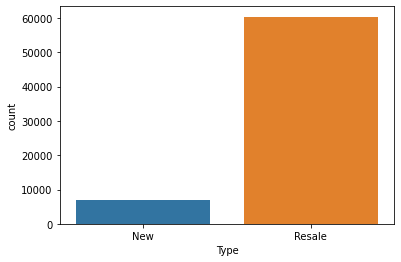

In [61]:
sns.countplot(x='Type', data=data)
pass

In [62]:
data['Building'].value_counts().index

CategoricalIndex(['Brick', 'Panel', 'Monolithic', 'Block', 'Wooden'], categories=['Block', 'Brick', 'Monolithic', 'Panel', 'Wooden'], ordered=False, dtype='category')

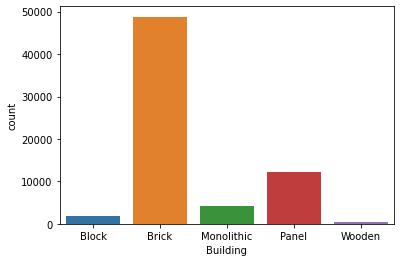

In [63]:
sns.countplot(x='Building', data=data)
pass

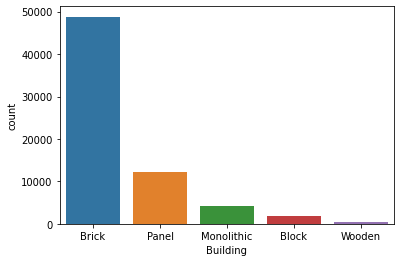

In [64]:
sns.countplot(x='Building', order=data['Building'].value_counts().index, data=data)
pass

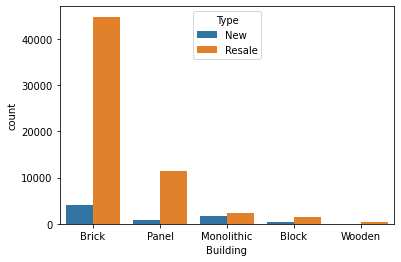

In [65]:
sns.countplot(x='Building', order=data['Building'].value_counts().index, hue='Type', data=data)
pass

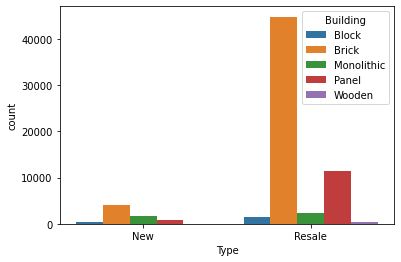

In [66]:
sns.countplot(x='Type', hue='Building', data=data)
pass

Для отрисовки диаграммы рассеивания мы можем воспользоваться более продвинутой функцией `scatterplot` из модуля `seaborn`. Например, в следующей диаграмме цвет маркеров соответствует типу строения `'Building'`, а размер - количеству комнат `'Rooms'`:

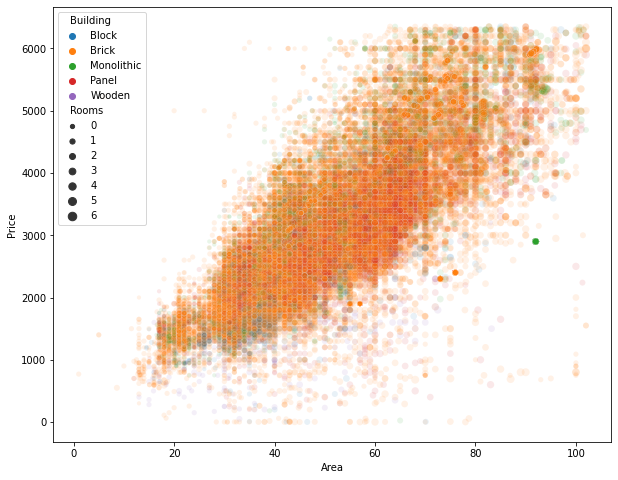

In [67]:
plt.figure(figsize = (10, 8))
sns.scatterplot(x='Area', y='Price', size='Rooms', hue='Building', data=data, alpha=0.1)
pass

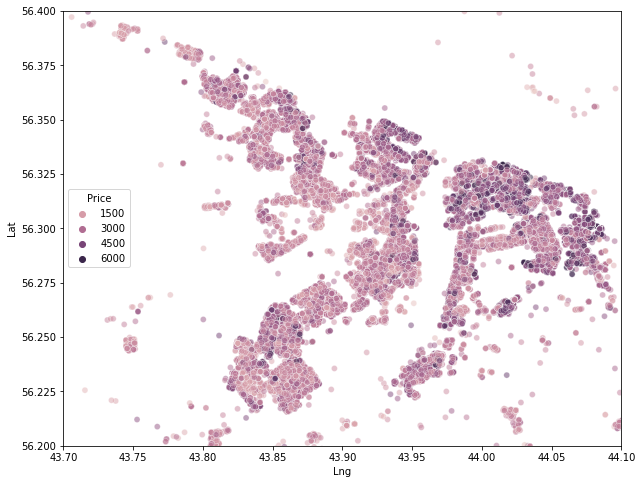

In [68]:
plt.figure(figsize = (10, 8))
sns.scatterplot(x='Lng', y='Lat', hue='Price', data=data, alpha=0.5)
plt.xlim([43.7, 44.1])
plt.ylim([56.2, 56.4])
pass

Мы видим, что наблюдается ожидаемая корреляция между количеством комнат и площадью квартиры. Также можно увидеть, что квартиры в панельных домах, как правило, имеют умеренные размеры и умеренные цены. Квартиры в монолитных домах, как правило, больше и дороже. Кирпичные дома бываю в разной ценовой категории, но самые большие и дорогие квартиры - в основном в кирпичных домах.

Построим все возможные диаграммы рассеивания для каждой пары переменных:

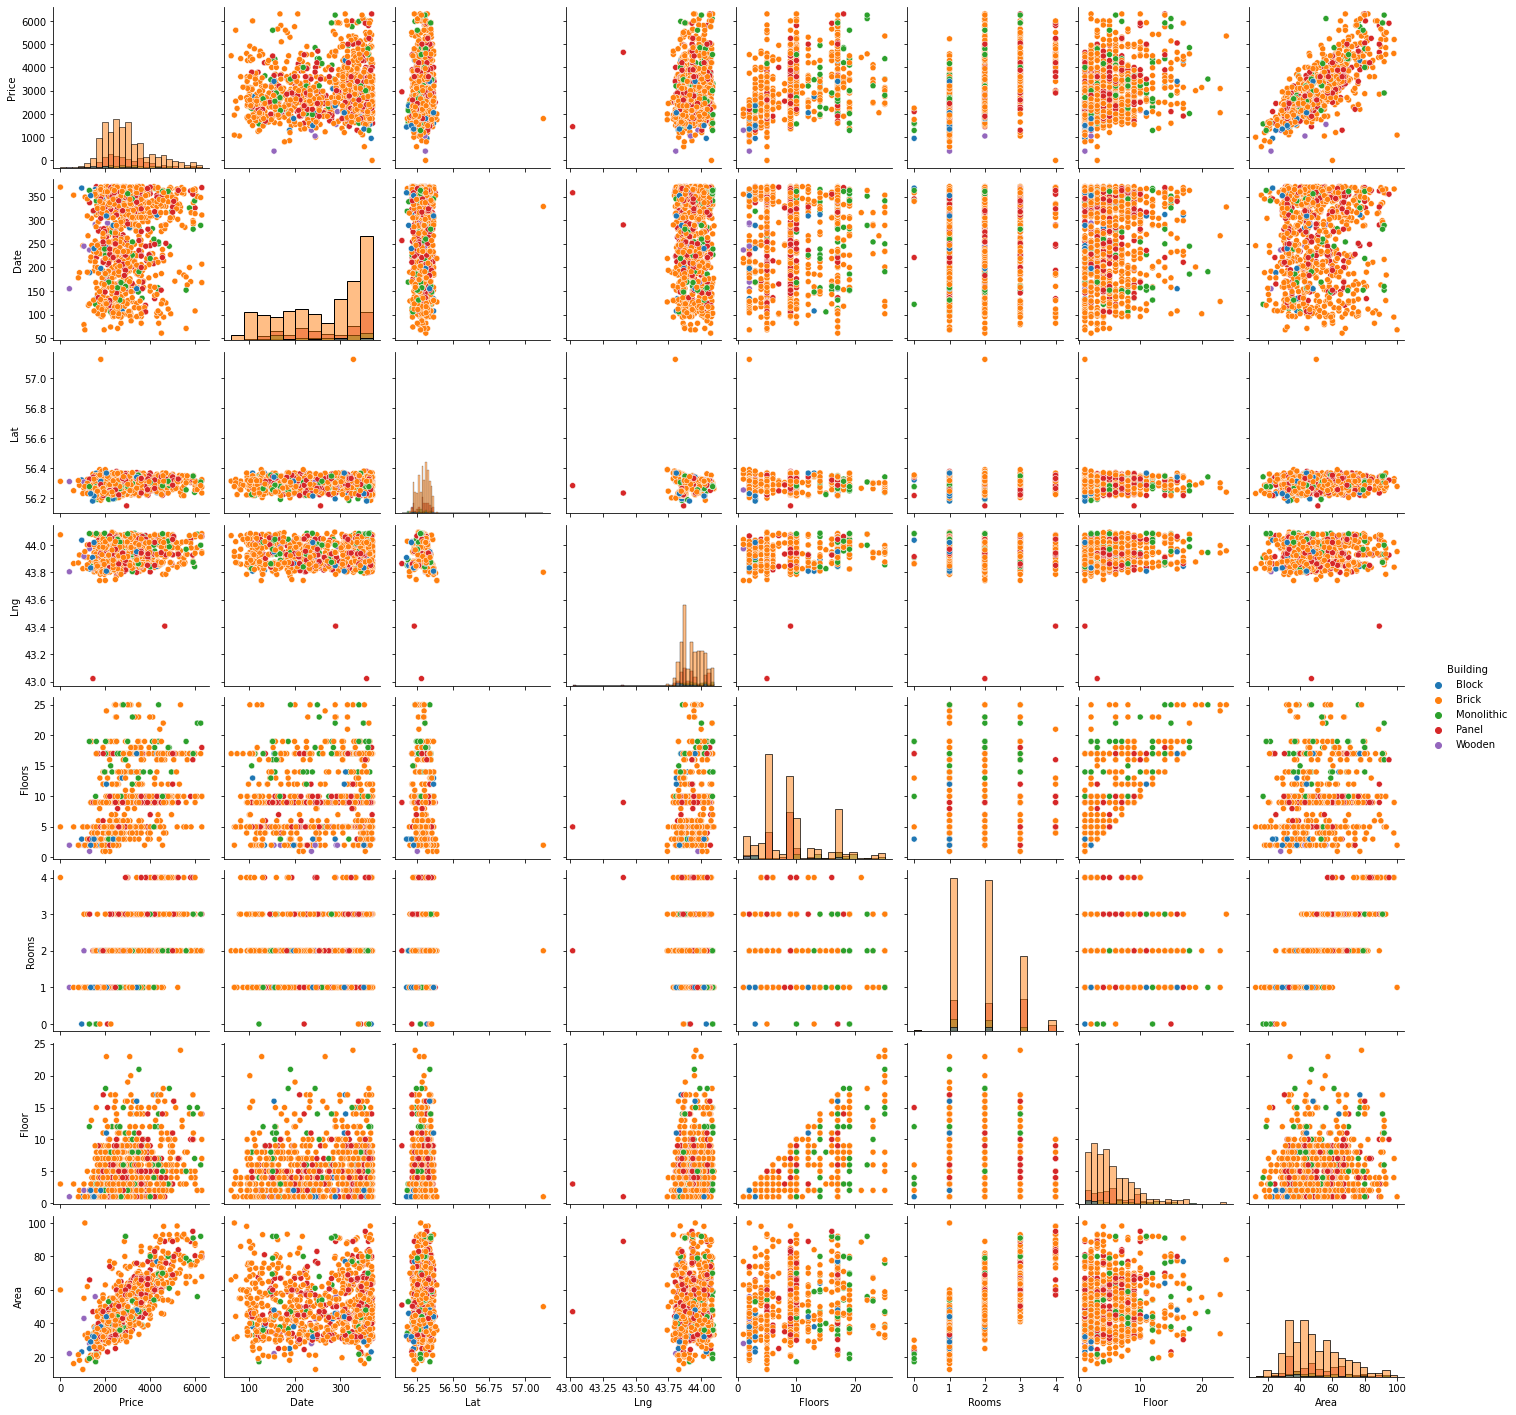

In [69]:
sns.pairplot(data.sample(1000), hue='Building', diag_kind='hist')
pass

На диаграммах, в частности, наблюдается попарная корреляция между `Price`, `Area` и `Rooms`.

На диагонали расположены гистограммы распределения признаков. Гистограммы можно построить отдельно.

Построить гистограмму можно с помощю функции `plt.hist` или `pd.hist`, но мы воспользуемся `displot` из библиотеки `seaborn`.

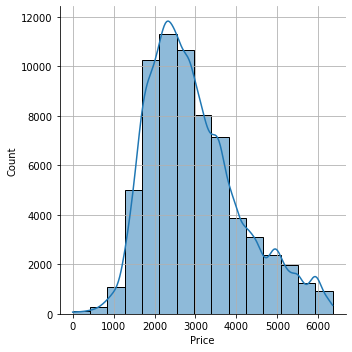

In [70]:
sns.displot(data['Price'], bins=15, kde=True)
plt.grid()
pass

Можно представить вместе и диаграмму рассеивания для пары признаков и соответствующие гистограммы:

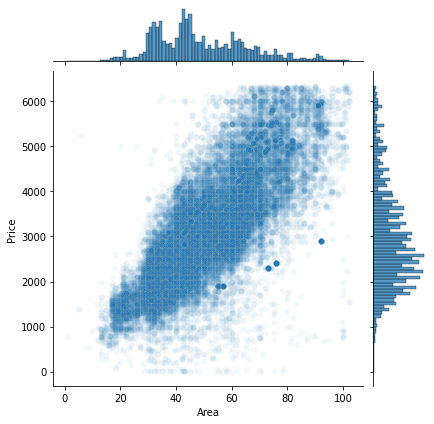

In [71]:
sns.jointplot(x='Area', y='Price', alpha=.05, data=data)
pass

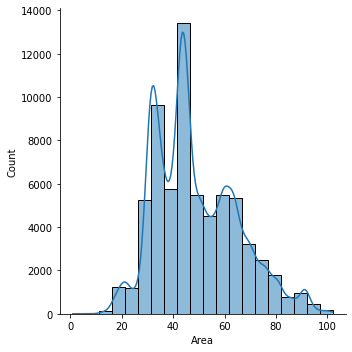

In [72]:
sns.displot(data['Area'], bins = 20, kde=True)
pass

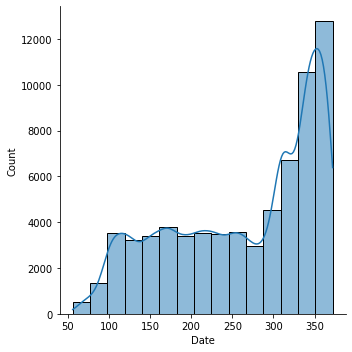

In [73]:
sns.displot(data['Date'], bins = 15, kde=True)
pass

*Ящик с усами* (*бокс-диаграмма*) - это один из возможных способов визуального представления распределения. Нижний и верхний концы ящика соответствуют 1-му и 3-му квартилям (25% и 75% квантилям соответственно), а горизонтальная линия внутри ящика - медиане. Верхний ус продолжается вверх вплоть до максимального значения, но не выше 1.5 межквартильного расстояния от верхней кромки ящика. Аналогично нижний ус - продолжается вниз до минимального значения, но не ниже 1.5 межквартильных расстояний от нижней кромки ящика. На концах усов ставятся небольшие зарубки. За пределами усов значения изображаются в виде отдельных точек - эти значения можно считать выбросами.

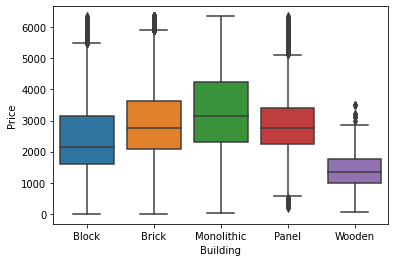

In [74]:
sns.boxplot(x="Building", y="Price", data=data)
pass

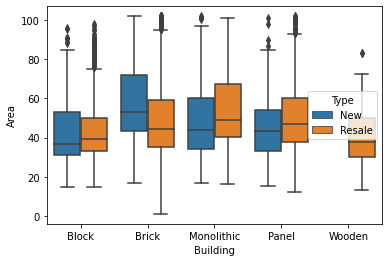

In [75]:
sns.boxplot(x="Building", y="Area", hue="Type", data=data)
pass

Также информацию о характере распределения можно получить из *скрипичных графиков* (violin plots). В этом случае изображают графики аппроксимации плотности вероятности.

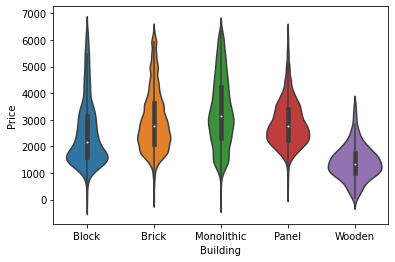

In [76]:
sns.violinplot(x="Building", y="Price", data=data)
pass

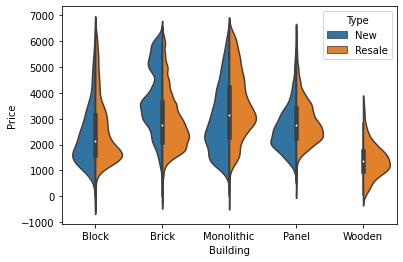

In [77]:
sns.violinplot(x="Building", y="Price", hue="Type", split=True, data=data)
pass

Можно вычислить матрицу корреляции для количественных признаков:

In [78]:
corr_mat = data.corr()
corr_mat

,Price,Date,Lat,Lng,Floors,Rooms,Floor,Area
Price,1.000000,0.044799,0.149800,0.304437,0.452960,0.506260,0.319399,0.804029
Date,0.044799,1.000000,0.009976,-0.002420,0.049472,0.000772,0.036681,0.021483
Lat,0.149800,0.009976,1.000000,0.002916,0.064957,0.068280,0.040407,0.117233
Lng,0.304437,-0.002420,0.002916,1.000000,0.211899,-0.022578,0.144156,0.117873
Floors,0.452960,0.049472,0.064957,0.211899,1.000000,-0.114516,0.643400,0.255864
Rooms,0.506260,0.000772,0.068280,-0.022578,-0.114516,1.000000,-0.064003,0.773123
Floor,0.319399,0.036681,0.040407,0.144156,0.643400,-0.064003,1.000000,0.173764
Area,0.804029,0.021483,0.117233,0.117873,0.255864,0.773123,0.173764,1.000000


Удобно использовать визуальный образ этой матрицы. Чем светлее ячейка, тем больше по абсолютной величине коэффициент корреляции:

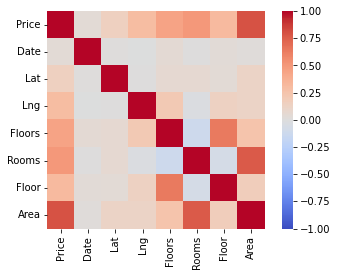

In [79]:
sns.heatmap(corr_mat, square=True, vmin=-1, vmax=1, cmap='coolwarm')
pass

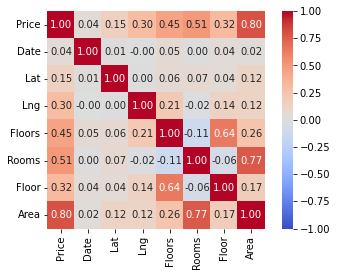

In [80]:
sns.heatmap(corr_mat, square=True, annot=True, fmt='.2f', vmin=-1, vmax=1, cmap='coolwarm')
pass

Выведем коэффициенты корреляции, большие заданного значения:

In [81]:
corr_mat > 0.5

,Price,Date,Lat,Lng,Floors,Rooms,Floor,Area
Price,True,False,False,False,False,True,False,True
Date,False,True,False,False,False,False,False,False
Lat,False,False,True,False,False,False,False,False
Lng,False,False,False,True,False,False,False,False
Floors,False,False,False,False,True,False,True,False
Rooms,True,False,False,False,False,True,False,True
Floor,False,False,False,False,True,False,True,False
Area,True,False,False,False,False,True,False,True


In [82]:
np.triu(corr_mat, k=1)

array([[ 0.00000000e+00,  4.47994307e-02,  1.49799945e-01,
         3.04436584e-01,  4.52959993e-01,  5.06259658e-01,
         3.19398699e-01,  8.04029156e-01],
       [ 0.00000000e+00,  0.00000000e+00,  9.97594110e-03,
        -2.42022953e-03,  4.94720015e-02,  7.72143567e-04,
         3.66811667e-02,  2.14826168e-02],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         2.91591719e-03,  6.49573283e-02,  6.82804909e-02,
         4.04074685e-02,  1.17233283e-01],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  2.11899122e-01, -2.25779745e-02,
         1.44156287e-01,  1.17872576e-01],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00, -1.14516072e-01,
         6.43400499e-01,  2.55864142e-01],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        -6.40026985e-02,  7.73123006e-01],
       [ 0.00000000e+00,  0.000000

In [83]:
corr_mat.where(np.triu(corr_mat > 0.5, k=1)).stack()

Price   Rooms    0.506260
        Area     0.804029
Floors  Floor    0.643400
Rooms   Area     0.773123
dtype: float64

In [84]:
corr_mat.where(np.triu(np.abs(corr_mat) > 0.5, k=1)).stack().sort_values(ascending=False)

Price   Area     0.804029
Rooms   Area     0.773123
Floors  Floor    0.643400
Price   Rooms    0.506260
dtype: float64

Достаточно большие значения этих коэффициентов вполне объяснимы.

Обратите внимание на небольшую корреляцию между ценой квартиры и географическими координатами (квартиры в нагорной части и особенно в нижегородском районе - дороже):

In [85]:
corr_mat.loc['Price', 'Lng'], corr_mat.loc['Price', 'Lat']

(0.3044365839893762, 0.1497999454946562)

Также обратите внимание, что коэффициент корреляции между `'Price'`, `'Date'` практически равен нулю

In [86]:
corr_mat.loc['Price', 'Date']

0.04479943065764708

Например, выберем все данные, соответствующие квартирам в деревянных строениях ценой больше 3 млн. и выше:

In [87]:
data.loc[(data['Building']=='Wooden') & (data['Price'] >= 3000), :]

,Price,Date,Lat,Lng,Type,Floors,Building,Rooms,Floor,Area
8548,3120.0,145,56.313518,44.008223,Resale,2.0,Wooden,3.0,1.0,70.0
12762,3100.0,310,56.323503,44.024052,Resale,2.0,Wooden,3.0,1.0,72.0
20220,3000.0,365,56.326333,44.021428,Resale,2.0,Wooden,2.0,1.0,53.0
23092,3200.0,181,56.266806,44.061916,Resale,3.0,Wooden,1.0,2.0,83.0
47589,3200.0,316,56.312075,44.039224,Resale,1.0,Wooden,2.0,1.0,52.0
54033,3500.0,312,56.323343,44.019398,Resale,2.0,Wooden,2.0,1.0,47.0
58941,3500.0,369,56.306727,43.992027,Resale,1.0,Wooden,2.0,1.0,40.0
60340,3500.0,351,56.319300,43.989053,Resale,1.0,Wooden,2.0,1.0,35.0


Или все данные, соответствующие продажам в деревянных новостройках:

In [88]:
data.loc[(data['Building']=='Wooden') & (data['Type']=='New'), :]

,Price,Date,Lat,Lng,Type,Floors,Building,Rooms,Floor,Area


Значения, которые принимают категориальные признаки, можно получить следующим образом:

In [89]:
data['Type'].unique()

['Resale', 'New']
Categories (2, object): ['New', 'Resale']

In [90]:
data['Building'].unique()

['Brick', 'Panel', 'Block', 'Monolithic', 'Wooden']
Categories (5, object): ['Block', 'Brick', 'Monolithic', 'Panel', 'Wooden']

## 2. Борьба с выбросами



In [91]:
data_raw.quantile([0.005,.01,.05,.1,.5,.9,.95,.99,.995])

,Price,Date,Lat,Lng,Floors,Rooms,Floor,Area
0.005,800.0,72.0,56.189870,43.784327,2.0,0.0,1.0,18.0
0.010,1000.0,81.0,56.195768,43.796760,2.0,0.0,1.0,19.0
0.050,1500.0,107.0,56.226034,43.822388,3.0,1.0,1.0,29.0
0.100,1700.0,127.0,56.233536,43.838127,4.0,1.0,1.0,31.0
0.500,2850.0,294.0,56.300760,43.932064,9.0,2.0,4.0,46.0
0.900,5500.0,361.0,56.347265,44.043617,17.0,3.0,10.0,80.0
0.950,7000.0,366.0,56.357200,44.068130,18.0,3.0,14.0,94.0
0.990,12000.0,371.0,56.368435,44.083769,24.0,4.0,17.0,150.0
0.995,14900.0,371.0,56.379601,44.085694,25.0,5.0,19.0,162.0


Мы видим, например, что $99\%$ всех значений признака `'Price'` находится в диапазоне от $800$ до $14967$ тыс. руб. (это значения квантилей, соответствующих уровням $0.005$ и $0.995$ соответственно)

$99\%$ всех значений `'Area'` находится в диапазоне от $18$ до $162$ кв. м. 

Удалим все строки таблицы, в которых `'Price'` или `'Area'` выходят за пределы квантилей $0.005$, $0.995$.

In [92]:
rows_to_drop = data_raw[
    (data_raw['Price'] < data_raw['Price'].quantile(0.005)) | (data_raw['Price'] > data_raw['Price'].quantile(0.995)) | 
    (data_raw['Area'] < data_raw['Area'].quantile(0.005)) | (data_raw['Area'] > data_raw['Area'].quantile(0.995))].index
data_raw = data_raw.drop(rows_to_drop)

In [93]:
data_raw.describe()

,Price,Date,Lat,Lng,Floors,Rooms,Floor,Area
count,71265.000000,71265.000000,71265.000000,71265.000000,71265.000000,71265.000000,71265.000000,71265.000000
mean,3310.907396,264.311120,56.295105,43.935371,9.406328,1.945990,5.188241,52.501778
std,1748.493102,87.897571,0.044836,0.081757,5.130792,0.910057,3.876387,21.400111
min,800.000000,56.000000,54.862751,41.806470,1.000000,0.000000,1.000000,18.000000
25%,2200.000000,190.000000,56.265022,43.868571,5.000000,1.000000,2.000000,37.000000
50%,2850.000000,295.000000,56.300147,43.931804,9.000000,2.000000,4.000000,46.000000
75%,3850.000000,344.000000,56.325320,44.005985,12.000000,3.000000,7.000000,63.000000
max,14900.000000,372.000000,57.127867,44.485489,25.000000,6.000000,25.000000,162.000000


In [94]:
data_raw.describe(include='category')

,Type,Building
count,71265,71265
unique,2,5
top,Resale,Brick
freq,63153,52425


## 3. Обучающая и тестовая выборки

Для предсказания цены квартиры будем использовать все входные признаки, кроме `Date`.

In [95]:
X = data_raw.drop(['Price', 'Date'], axis=1)
y = data_raw['Price']

Разобьем данные на обучающую и тестовую выборки в пропорции 3:1 (75% - обучающая выборка, 25% - тестовая):

In [96]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 

N_train, N_test

(53448, 17817)

##  4. Заполнение пропущенных значений 

Пропущенные значения в таблице представлены значениями `np.nan`. 
Посмотрим, сколько пропущенных значений в каждом столбце матрицы:
`na` - not available

In [97]:
X_train.isna().sum()  

Lat         0
Lng         0
Type        0
Floors      0
Building    0
Rooms       0
Floor       0
Area        0
dtype: int64

In [98]:
X_test.isna().sum()  

Lat         0
Lng         0
Type        0
Floors      0
Building    0
Rooms       0
Floor       0
Area        0
dtype: int64

С пропущенными значениями надо что-то сделать. Например, можно просто удалить строки с пропущенными значениями. В нашем случае это разумно, так как таких строк немного. В некоторых случаях можно удалить столбцы с пропущенными значениями. Однако если данных мало такие простые стратегии могут привести к тому, что данных станет вообще ничтожное количество.

Простая разумная стратегия - заполнить пропущенные значения медианой или средним (для количественных признаков) или модой (для номинальных признаков).

Заполним медианами пропущенные значения в столбцах, соответствующих числовым признакам:

In [99]:
from sklearn.impute import SimpleImputer
imp_num = SimpleImputer(missing_values=np.nan, strategy='median')
imp_num.fit(X_train[['Floors', 'Rooms', 'Floor', 'Area']])

SimpleImputer(strategy='median')

In [100]:
X_train[['Floors', 'Rooms', 'Floor', 'Area']] = imp_num.transform(X_train[['Floors', 'Rooms', 'Floor', 'Area']])

Заполним наиболее частыми значения в столбцах, соответствующих категориальным признакам/ Еще можно ввести новый признак - индикатор пропущенного значения (легко сделать при бинаризации ниже).

In [101]:
from sklearn.impute import SimpleImputer
imp_cat = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imp_cat.fit(X_train[['Type', 'Building']])

SimpleImputer(strategy='most_frequent')

In [102]:
X_train[['Type', 'Building']] = imp_cat.transform(X_train[['Type', 'Building']])

In [103]:
X_train.isna().sum()  

Lat         0
Lng         0
Type        0
Floors      0
Building    0
Rooms       0
Floor       0
Area        0
dtype: int64

## 5. Бинаризация номинальных признаков

Алгоритмы из библиотеки scikit-learn (почти) не умеют работать напрямую с категориальными признаками. Поэтому их вначале надо закодировать с помощью числовых принаков.

Бинарный признак `'Type'` заменим на числовой. 

`'Resale'` → 0, `'New'`→ 1 

К категориальному (небинарному) признаку `'Building'` применим метод *бинаризации* (*one-hot encoding*), 
который заключается в следующем.

Этот признак принимает 5 значений: `'Block'`, `'Brick'`, `'Monolithic'`, `'Panel'`, `'Wooden'`.

Вместо признака `'Building'` будем использовать 5 новых признаков (dummy-признаков, dummy - фиктивный), которые так и назовем `'Building_Block'`, `'Building_Brick'`, `'Building_Monolithic'`, `'Building_Panel'`, `'Building_Wooden'`. При этом 
- если признак `'Building'` принимает значение `'Block'`, то признак `'Building_Block'` равен 1, а все остальные 0;
- если признак `'Building'` принимает значение `'Brick'`, то признак `'Building_Brick'` равен 1, а все остальные 0
- и т.д.

In [104]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(drop='if_binary', sparse=False)
enc.fit(X_train[['Type', 'Building']])

OneHotEncoder(drop='if_binary', sparse=False)

In [105]:
dummies = pd.DataFrame(enc.transform(X_train[['Type', 'Building']]), 
                       columns=enc.get_feature_names_out(), index=X_train.index)
dummies.head()

,Type_Resale,Building_Block,Building_Brick,Building_Monolithic,Building_Panel,Building_Wooden
19422,1.0,0.0,0.0,0.0,1.0,0.0
23316,1.0,0.0,1.0,0.0,0.0,0.0
60962,1.0,0.0,0.0,0.0,1.0,0.0
59780,1.0,0.0,1.0,0.0,0.0,0.0
27770,1.0,0.0,1.0,0.0,0.0,0.0


Добавим эти dummy-столбцы к таблице и удалим столбцы `Type`, `Building`:

In [106]:
X_train = pd.concat((X_train, dummies), axis=1).drop(['Type', 'Building'], axis=1)

In [107]:
X_train.head()

,Lat,Lng,Floors,Rooms,Floor,Area,Type_Resale,Building_Block,Building_Brick,Building_Monolithic,Building_Panel,Building_Wooden
19422,56.341952,43.917206,9.0,2.0,2.0,45.0,1.0,0.0,0.0,0.0,1.0,0.0
23316,56.329500,43.914845,9.0,2.0,3.0,43.0,1.0,0.0,1.0,0.0,0.0,0.0
60962,56.340819,43.948324,17.0,1.0,10.0,49.0,1.0,0.0,0.0,0.0,1.0,0.0
59780,56.350512,43.866074,5.0,3.0,2.0,57.9,1.0,0.0,1.0,0.0,0.0,0.0
27770,56.319185,43.868616,6.0,2.0,4.0,44.0,1.0,0.0,1.0,0.0,0.0,0.0


## 6. Масштабирование количественных признаков

Перед применением алгоритмов машинного обучения количественные признаки полезно нормализовать.

Наиболее часто используют один из трех следующих способов:
- *приведение к отрезку $[0,1]$* - это линейное преобразование, приводящее все значения к заданному отрезку;
- *стандартизация* - линейное преобразование, приводящее все значения к нулевому среднему и единичному стандартному отклонению;
- *нормализация* - приведение данных к единичной норме.

Выполним стандартизацию всех признаков:

In [108]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = pd.DataFrame(scaler.transform(X_train), columns=X_train.columns, index=X_train.index)

In [109]:
X_train.describe()

,Lat,Lng,Floors,Rooms,Floor,Area,Type_Resale,Building_Block,Building_Brick,Building_Monolithic,Building_Panel,Building_Wooden
count,5.344800e+04,5.344800e+04,5.344800e+04,5.344800e+04,5.344800e+04,5.344800e+04,5.344800e+04,5.344800e+04,5.344800e+04,5.344800e+04,5.344800e+04,5.344800e+04
mean,2.241863e-13,-5.010677e-14,-6.381165e-17,-1.047575e-16,6.806576e-17,6.540694e-17,5.556931e-17,1.944261e-17,-3.429876e-17,-5.782931e-17,8.388573e-17,-4.519992e-18
std,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00
min,-3.191520e+01,-2.604913e+01,-1.643393e+00,-2.135336e+00,-1.084309e+00,-1.610021e+00,-2.795610e+00,-1.655641e-01,-1.668913e+00,-2.590018e-01,-4.538245e-01,-6.220230e-02
25%,-6.730771e-01,-8.164044e-01,-8.608994e-01,-1.040149e+00,-8.262624e-01,-7.251302e-01,3.577036e-01,-1.655641e-01,-1.668913e+00,-2.590018e-01,-4.538245e-01,-6.220230e-02
50%,1.167785e-01,-4.720080e-02,-7.840599e-02,5.503801e-02,-3.101695e-01,-3.059715e-01,3.577036e-01,-1.655641e-01,5.991926e-01,-2.590018e-01,-4.538245e-01,-6.220230e-02
75%,6.717248e-01,8.660492e-01,5.084641e-01,1.150225e+00,4.639700e-01,4.857728e-01,3.577036e-01,-1.655641e-01,5.991926e-01,-2.590018e-01,-4.538245e-01,-6.220230e-02
max,1.854441e+01,5.414565e+00,3.051568e+00,4.435785e+00,5.108807e+00,5.096519e+00,3.577036e-01,6.039956e+00,5.991926e-01,3.860977e+00,2.203495e+00,1.607658e+01


# 7. Обучаем модель

## Линейная регрессия 

- Создаем модель и задаем гиперпараметры (конструктор)
- Тренируем модель (метод `fit`)
- Используем модель на новых данных (метод `predict`) и измеряем качество модели

Ищем коэффициенты (веса) $\beta_0, \beta_1, \dots, \beta_d$ _линейной модели_
$$
f(x) = \beta_0 + \sum_{j=1}^d \beta_j x_j,
$$
минимизирующие остаточную сумму квадратов
$$
{\rm RSS} = \sum_{i=1}^N \left(f(x^{(i)}) - y^{(i)}\right)^2
$$

In [110]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [111]:
y_train_predict = model.predict(X_train)

In [112]:
model.coef_

array([  59.7831507 ,  221.01887798,  102.80914726, -341.60755599,
         32.13823921, 1681.36886465,   42.65708323,    2.25424698,
         26.86087342,  -12.26005678,  -16.9017508 ,  -46.31710014])

In [113]:
y_train

19422    3300.0
23316    2600.0
60962    3550.0
59780    3450.0
27770    2300.0
          ...  
37814    2980.0
6368     2350.0
55796    2190.0
878      1830.0
16046    3900.0
Name: Price, Length: 53448, dtype: float64

In [114]:
y_train_predict

array([2621.13624132, 2555.68219341, 3618.3794851 , ..., 2541.74121805,
       1622.38177093, 2680.78121582])

In [115]:
RSS = ((y_train_predict - y_train)**2).sum()
RSS/N_train, (RSS/N_train)**.5

(680356.7341600332, 824.8373986186812)

# 8.Тестируем модель

Мы сделали много преобразований с `X_train`. Чтобы нашу модель опробовать на `X_test`, надо вначале с `X_test` выполнить те же преобразования.  

In [116]:
# Заполнение пропущенных значений:
X_test[['Floors', 'Rooms', 'Floor', 'Area']] = imp_num.transform(
    X_test[['Floors', 'Rooms', 'Floor', 'Area']])
X_test[['Type', 'Building']] = imp_cat.transform(X_test[['Type', 'Building']])

# One-hot encoding:
dummies = pd.DataFrame(enc.transform(X_test[['Type', 'Building']]), 
                       columns=enc.get_feature_names_out(), index=X_test.index)
X_test = pd.concat((X_test, dummies), axis=1).drop(['Type', 'Building'], axis=1)

# Масштабирование:
X_test = pd.DataFrame(scaler.transform(X_test), 
                      columns=X_test.columns, index=X_test.index)

In [117]:
y_train_predict = model.predict(X_train)
y_test_predict  = model.predict(X_test)

### Измеряем метрики качества

*Остаточная сумма квадратов* (*residual sum of squares*):
$$
{\rm RSS} = \sum_{i=1}^N \left(y^{(i)} - \widehat{y}^{(i)} \right)^2
$$
где 
$$
\widehat{y}^{(i)} = \beta_0 + \sum_{j=1}^d \beta_j x_j^{(i)}
$$

*Полная сумма квадратов*:
$$
{\rm TSS} = \sum_{i=1}^N \left(y^{(i)} - \overline{y} \right)^2,
$$
где 
$$
\overline{y} = \frac{1}{N} \sum_{i=1}^N y^{(i)}
$$

$$
\overline{y} = \beta_0 + \sum_{j=1}^d \beta_j \overline{x}_j
$$


*Сумма квадратов, обусловленная регрессией*:
$$
{\rm ESS} = \sum_{i=1}^N \left(\overline{y} - \widehat{y}^{(i)} \right)^2
$$

Можно показать, что
$$
{\rm TSS} = {\rm RSS} + {\rm ESS}
$$

*Коэффициент детерминации*, или *коэффициент регрессии Пирсона*:
$$
R^2 = 1 - \frac{{\rm RSS}}{{\rm TSS}} = \frac{{\rm ESS}}{{\rm TSS}}
$$
— доля объясняемого регрессией разброса относительно среднего (чем ближе к 1, тем модель лучше объясняет данные).

$$
0 \le R^2 \le 1
$$

$R = \sqrt{R^2}$ равно (по модулю) выборочной корреляции между $y^{(i)}$ и $\widehat{y}^{(i)}$

Если $d = 1$, то $R$ равен (по модулю) выборочной корреляции между $y^{(i)}$ и $x^{(i)}$.

*Средняя сумма квадратов отклонений* (MSE - Mean Squared Error)
$$
{\rm MSE} = \frac{1}{N} {\rm RSS} = \frac{1}{N} \sum_{i=1}^N \left(y^{(i)} - \widehat{y}^{(i)} \right)^2
$$

*Среднеквадратическая ошибка* (RMSE - Rooted Mean Squared Error)
$$
{\rm RMSE} = \sqrt{{\rm MSE}}
$$

MSE иногда называют *средней квадратической ошибкой*, что, конечно же, правильней отражает суть дела, но добавляет путаницы.

Для вычисления этих метрик можно воспользоваться соответствующими функциями из модуля `metrics` библиотеки `sklearn`, но можно также вычислить "вручную". Значение $R^2$ также вычисляет метод `score` объекта `LinearRegression`

In [118]:
from sklearn.metrics import mean_squared_error, r2_score

MSE_train = mean_squared_error(y_train, y_train_predict)
MSE_test  = mean_squared_error(y_test,  y_test_predict)
R2_train = r2_score(y_train, y_train_predict)
R2_test  = r2_score(y_test,  y_test_predict)

MSE_train, MSE_test, R2_train, R2_test

(680356.7341600332, 646791.5460875952, 0.7786012863220029, 0.7850880890311308)

In [119]:
model.score(X_train, y_train) # Коэффициент детерминации R^2

0.7786012863220029

In [120]:
model.score(X_test, y_test)

0.7850880890311308

In [121]:
#MSE_train = np.mean((y_train_predict - y_train)**2)
#MSE_test  = np.mean((y_test_predict - y_test)**2)
MSE_train = ((y_train_predict - y_train)**2).mean()
MSE_test  = ((y_test_predict - y_test)**2).mean()
MSE_train, MSE_test

(680356.7341600332, 646791.5460875952)

In [122]:
RMSE_train = (MSE_train)**(.5)
RMSE_test = (MSE_test)**(.5)
RMSE_train, RMSE_test

(824.8373986186812, 804.2335146508103)

In [123]:
RMSE_table = pd.DataFrame(columns=('train', 'test'))
RMSE_table.loc['Linear Regression, all features', :] = (RMSE_train, RMSE_test)

In [124]:
RMSE_table

,train,test
"Linear Regression, all features",824.837399,804.233515


In [125]:
R2_table = pd.DataFrame(columns=('train', 'test'))
R2_table.loc['Linear Regression, all features', :] = (R2_train, R2_test)
R2_table

,train,test
"Linear Regression, all features",0.778601,0.785088


### Если предсказывать цену только по площади квартиры?

Попробуем построить линейную модель, описывающую зависимость `Price` только от `Area`

In [126]:
model = LinearRegression()
model.fit(X_train[['Area']], y_train)

y_train_predict = model.predict(X_train[['Area']])
y_test_predict  = model.predict(X_test[['Area']])

In [127]:
RMSE_train = mean_squared_error(y_train, y_train_predict)**.5
RMSE_test  = mean_squared_error(y_test,  y_test_predict)**.5

In [128]:
RMSE_table.loc['Linear Regression, Area', :] = (RMSE_train, RMSE_test)
RMSE_table

,train,test
"Linear Regression, all features",824.837399,804.233515
"Linear Regression, Area",917.371812,899.303615


In [129]:
R2_train = r2_score(y_train, y_train_predict)
R2_test  = r2_score(y_test,  y_test_predict)
R2_table.loc['Linear Regression, Area', :] = (R2_train, R2_test)
R2_table

,train,test
"Linear Regression, all features",0.778601,0.785088
"Linear Regression, Area",0.72614,0.731275


### Как цена зависит от количества комнат?

Попробуем построить линейную модель, описывающую зависимость `Price` только от `Rooms`

In [130]:
model = LinearRegression()
model.fit(X_train[['Rooms']], y_train)

y_train_predict = model.predict(X_train[['Rooms']])
y_test_predict  = model.predict(X_test[['Rooms']])

In [131]:
RMSE_train = mean_squared_error(y_train, y_train_predict)**.5
RMSE_test  = mean_squared_error(y_test,  y_test_predict)**.5

In [132]:
RMSE_table.loc['Linear Regression, Rooms', :] = (RMSE_train, RMSE_test)
RMSE_table

,train,test
"Linear Regression, all features",824.837399,804.233515
"Linear Regression, Area",917.371812,899.303615
"Linear Regression, Rooms",1458.981116,1443.848314


Ошибка заметно возросла

In [133]:
R2_train = r2_score(y_train, y_train_predict)
R2_test  = r2_score(y_test,  y_test_predict)
R2_table.loc['Linear Regression, Rooms', :] = (R2_train, R2_test)
R2_table

,train,test
"Linear Regression, all features",0.778601,0.785088
"Linear Regression, Area",0.72614,0.731275
"Linear Regression, Rooms",0.307312,0.307309


### Как цена зависит от площади и количества комнат?

Попробуем построить линейную модель, описывающую зависимость `Price` от `Area` и `Rooms`

In [134]:
model = LinearRegression()
model.fit(X_train[['Area', 'Rooms']], y_train)

y_train_predict = model.predict(X_train[['Area', 'Rooms']])
y_test_predict  = model.predict(X_test[['Area', 'Rooms']])

In [135]:
RMSE_train = mean_squared_error(y_train, y_train_predict)**.5
RMSE_test  = mean_squared_error(y_test,  y_test_predict)**.5

In [136]:
RMSE_table.loc['Linear Regression, Area & Rooms', :] = (RMSE_train, RMSE_test)
RMSE_table

,train,test
"Linear Regression, all features",824.837399,804.233515
"Linear Regression, Area",917.371812,899.303615
"Linear Regression, Rooms",1458.981116,1443.848314
"Linear Regression, Area & Rooms",866.966025,848.621866


In [137]:
R2_train = r2_score(y_train, y_train_predict)
R2_test  = r2_score(y_test,  y_test_predict)
R2_table.loc['Linear Regression, Area & Rooms', :] = (R2_train, R2_test)
R2_table

,train,test
"Linear Regression, all features",0.778601,0.785088
"Linear Regression, Area",0.72614,0.731275
"Linear Regression, Rooms",0.307312,0.307309
"Linear Regression, Area & Rooms",0.755408,0.76071


## 9.1 Метод $k$ ближайших соседей ($k$NN, $k$ nearest neighbours)

In [138]:
from sklearn.neighbors import KNeighborsRegressor

model = KNeighborsRegressor(n_neighbors=7) # по умолчанию n_neighbors=5
model.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=7)

In [139]:
y_train_predict = model.predict(X_train)
y_test_predict  = model.predict(X_test)

In [140]:
RMSE_train = mean_squared_error(y_train, y_train_predict)**.5
RMSE_test  = mean_squared_error(y_test,  y_test_predict)**.5
R2_train = r2_score(y_train, y_train_predict)
R2_test  = r2_score(y_test,  y_test_predict)

In [141]:
RMSE_table.loc['k Nearest Neighbours', :] = (RMSE_train, RMSE_test)
RMSE_table

,train,test
"Linear Regression, all features",824.837399,804.233515
"Linear Regression, Area",917.371812,899.303615
"Linear Regression, Rooms",1458.981116,1443.848314
"Linear Regression, Area & Rooms",866.966025,848.621866
k Nearest Neighbours,510.322679,599.256296


In [142]:
R2_table.loc['k Nearest Neighbours', :] = (R2_train, R2_test)
R2_table

,train,test
"Linear Regression, all features",0.778601,0.785088
"Linear Regression, Area",0.72614,0.731275
"Linear Regression, Rooms",0.307312,0.307309
"Linear Regression, Area & Rooms",0.755408,0.76071
k Nearest Neighbours,0.915252,0.880678


## 9.2 Полносвязная нейронная сеть (Full-connected Neural Network)

Full connected neural network, or multi-layer perceptron

In [143]:
from sklearn.neural_network import MLPRegressor

model = MLPRegressor(hidden_layer_sizes=(20,10))
model.fit(X_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor(hidden_layer_sizes=(20, 10))

In [144]:
y_train_predict = model.predict(X_train)
y_test_predict  = model.predict(X_test)

In [145]:
RMSE_train = mean_squared_error(y_train, y_train_predict)**.5
RMSE_test  = mean_squared_error(y_test,  y_test_predict)**.5
R2_train = r2_score(y_train, y_train_predict)
R2_test  = r2_score(y_test,  y_test_predict)

In [146]:
RMSE_table.loc['Neural Network', :] = (RMSE_train, RMSE_test)
RMSE_table

,train,test
"Linear Regression, all features",824.837399,804.233515
"Linear Regression, Area",917.371812,899.303615
"Linear Regression, Rooms",1458.981116,1443.848314
"Linear Regression, Area & Rooms",866.966025,848.621866
k Nearest Neighbours,510.322679,599.256296
Neural Network,758.018405,742.585062


In [147]:
R2_table.loc['Neural Network', :] = (R2_train, R2_test)
R2_table

,train,test
"Linear Regression, all features",0.778601,0.785088
"Linear Regression, Area",0.72614,0.731275
"Linear Regression, Rooms",0.307312,0.307309
"Linear Regression, Area & Rooms",0.755408,0.76071
k Nearest Neighbours,0.915252,0.880678
Neural Network,0.813019,0.816773


## 9.3 Случайный лес (Random Forest)

In [156]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=200) # по умолчанию n_estimators=100
model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=200)

In [157]:
y_train_predict = model.predict(X_train)
y_test_predict  = model.predict(X_test)

In [158]:
RMSE_train = mean_squared_error(y_train, y_train_predict)**.5
RMSE_test  = mean_squared_error(y_test,  y_test_predict)**.5
R2_train = r2_score(y_train, y_train_predict)
R2_test  = r2_score(y_test,  y_test_predict)

In [159]:
RMSE_table.loc['Random Forest', :] = (RMSE_train, RMSE_test)
RMSE_table

,train,test
"Linear Regression, all features",824.837399,804.233515
"Linear Regression, Area",917.371812,899.303615
"Linear Regression, Rooms",1458.981116,1443.848314
"Linear Regression, Area & Rooms",866.966025,848.621866
k Nearest Neighbours,510.322679,599.256296
Neural Network,758.018405,742.585062
Random Forest,174.448808,451.254981


In [160]:
R2_table.loc['Random Forest', :] = (R2_train, R2_test)
R2_table

,train,test
"Linear Regression, all features",0.778601,0.785088
"Linear Regression, Area",0.72614,0.731275
"Linear Regression, Rooms",0.307312,0.307309
"Linear Regression, Area & Rooms",0.755408,0.76071
k Nearest Neighbours,0.915252,0.880678
Neural Network,0.813019,0.816773
Random Forest,0.990097,0.932339


Метод Random Forest позволяет получить некоторые оценки "*важности*" признаков.
Чем значение больше, тем признак важнее.

In [153]:
importances = model.feature_importances_
importances

array([6.20244060e-02, 7.42336693e-02, 5.59609168e-02, 1.14100829e-02,
       1.67363449e-02, 7.71499012e-01, 3.01374187e-03, 3.38173453e-04,
       1.33011778e-03, 1.87242774e-03, 1.44515495e-03, 1.35952167e-04])

In [154]:
np.sum(importances)

1.0

In [161]:
importances = pd.Series(model.feature_importances_, index=X_train.columns).sort_values(ascending=False)
importances

Area                   0.771924
Lng                    0.074320
Lat                    0.061761
Floors                 0.056016
Floor                  0.016663
Rooms                  0.011328
Type_Resale            0.002887
Building_Monolithic    0.001936
Building_Panel         0.001398
Building_Brick         0.001310
Building_Block         0.000319
Building_Wooden        0.000139
dtype: float64

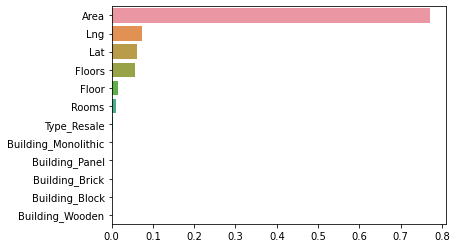

In [162]:
sns.barplot(y=importances.index, x=importances, orient="h")
pass

## 9.4 Градиентный бустинг (Gradient Boosting)

In [163]:
from sklearn.ensemble import GradientBoostingRegressor

model = GradientBoostingRegressor(n_estimators=200) # по умолчанию n_estimators=100
model.fit(X_train, y_train)

GradientBoostingRegressor(n_estimators=200)

In [164]:
y_train_predict = model.predict(X_train)
y_test_predict  = model.predict(X_test)

In [165]:
RMSE_train = mean_squared_error(y_train, y_train_predict)**.5
RMSE_test  = mean_squared_error(y_test,  y_test_predict)**.5
R2_train = r2_score(y_train, y_train_predict)
R2_test  = r2_score(y_test,  y_test_predict)

In [166]:
RMSE_table.loc['Gradient Boosting', :] = (RMSE_train, RMSE_test)
RMSE_table

,train,test
"Linear Regression, all features",824.837399,804.233515
"Linear Regression, Area",917.371812,899.303615
"Linear Regression, Rooms",1458.981116,1443.848314
"Linear Regression, Area & Rooms",866.966025,848.621866
k Nearest Neighbours,510.322679,599.256296
Neural Network,758.018405,742.585062
Random Forest,174.448808,451.254981
Gradient Boosting,582.641457,591.897175


In [167]:
R2_table.loc['Gradient Boosting', :] = (R2_train, R2_test)
R2_table

,train,test
"Linear Regression, all features",0.778601,0.785088
"Linear Regression, Area",0.72614,0.731275
"Linear Regression, Rooms",0.307312,0.307309
"Linear Regression, Area & Rooms",0.755408,0.76071
k Nearest Neighbours,0.915252,0.880678
Neural Network,0.813019,0.816773
Random Forest,0.990097,0.932339
Gradient Boosting,0.889531,0.88359


In [168]:
importances = model.feature_importances_
importances

array([3.27483257e-02, 6.36349181e-02, 4.00621297e-02, 6.31639890e-03,
       3.77249921e-03, 8.50492305e-01, 1.62808210e-03, 1.89119175e-05,
       1.97276129e-04, 1.17069336e-04, 7.55021115e-04, 2.57063183e-04])

In [170]:
importances = pd.Series(model.feature_importances_, index=X_train.columns).sort_values(ascending=False)
importances

Area                   0.850492
Lng                    0.063635
Floors                 0.040062
Lat                    0.032748
Rooms                  0.006316
Floor                  0.003772
Type_Resale            0.001628
Building_Panel         0.000755
Building_Wooden        0.000257
Building_Brick         0.000197
Building_Monolithic    0.000117
Building_Block         0.000019
dtype: float64

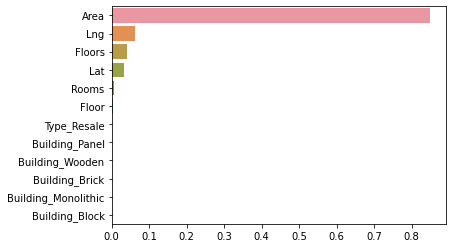

In [171]:
sns.barplot(y=importances.index, x=importances, orient="h")
pass

# 10. Использование Pipeline

`Pipeline` - удобный инструмент, позволяющий соединять вместе предобработку и основные методы модели

In [172]:
X = data_raw.drop(['Price'], axis=1)
y = data_raw['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 

In [173]:
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import PolynomialFeatures
from sklearn.compose import make_column_selector

In [174]:
!pip install feature_engine
from feature_engine.selection import DropFeatures

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## 10.1 Линейная регрессия

In [175]:
ppl = Pipeline([
    # Удаляем нерелевантный признак:
    ('drop_column', DropFeatures(['Date'])),
    # Заполнение пропущенных значений:
    ('impute', ColumnTransformer([
        # Заполнение пропущенных числовых признаков:
        ('num', make_pipeline(
            SimpleImputer(strategy='median'),
            StandardScaler()),
            make_column_selector(dtype_include='float')
        ),
        # Заполнение пропущенных категориальных признаков:
        ('cat', make_pipeline(
            SimpleImputer(strategy='most_frequent'),
            OneHotEncoder()),
            make_column_selector(dtype_include='category')
        )])
    ),
    # Добавляем новые признаки:
    ('poly_feature', PolynomialFeatures(degree=3)),
    # Обучение:
    ('fit', LinearRegression())
])

In [176]:
ppl.fit(X_train, y_train)
y_train_predict = ppl.predict(X_train)
y_test_predict = ppl.predict(X_test)
RMSE_train = mean_squared_error(y_train, y_train_predict)**.5
RMSE_test  = mean_squared_error(y_test,  y_test_predict)**.5
RMSE_train, RMSE_test

(711.8467303998617, 755.4573307508729)

## 10.2 *k*NN

In [181]:
ppl = Pipeline([
    # Удаляем нерелевантный признак:
    ('drop_column', DropFeatures(['Date'])),
    # Заполнение пропущенных значений:
    ('impute', ColumnTransformer([
        # Заполнение пропущенных числовых признаков:
        ('num', make_pipeline(
            SimpleImputer(strategy='median'),
            StandardScaler()),
            make_column_selector(dtype_include='float')
        ),
        # Заполнение пропущенных категориальных признаков:
        ('cat', make_pipeline(
            SimpleImputer(strategy='most_frequent'),
            OneHotEncoder()),
            make_column_selector(dtype_include='category')
        )])
    ),
    # Обучение:
    ('fit', KNeighborsRegressor())
])

## Подбор гиперпараметров

In [207]:
from sklearn.model_selection import GridSearchCV

k_arr = np.array([1, 2, 3, 4, 5, 7, 10, 15, 20, 30, 40, 50])

params = {
    'fit__n_neighbors': k_arr,
}

model = GridSearchCV(ppl, params, scoring='neg_mean_squared_error')
model.fit(X_train, y_train)

model.best_score_, model.best_params_

(-359757.5400958352, {'fit__n_neighbors': 3})

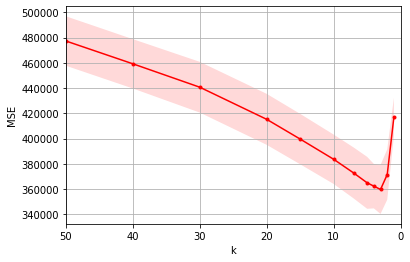

In [215]:
MSE_arr = -model.cv_results_['mean_test_score']
std_arr = model.cv_results_['std_test_score']
plt.plot(k_arr, MSE_arr, 'r.-')
plt.fill_between(k_arr, MSE_arr - std_arr, MSE_arr + std_arr, alpha=0.15, facecolor='red')
plt.xlim([max(k_arr), 0])
plt.grid()
plt.xlabel('k')
plt.ylabel('MSE')
pass

Теперь обучим модель при найденом оптимальном значении гиперпараметра:

In [214]:
ppl.set_params(fit__n_neighbors=model.best_params_['fit__n_neighbors'])
ppl.fit(X_train, y_train)
y_train_predict = ppl.predict(X_train)
y_test_predict = ppl.predict(X_test)
RMSE_train = mean_squared_error(y_train, y_train_predict)**.5
RMSE_test  = mean_squared_error(y_test,  y_test_predict)**.5
RMSE_train, RMSE_test

(387.26227875473234, 582.9622037627561)

## 10.3 Random Forests

In [179]:
ppl = Pipeline([
    # Удаляем нерелевантный признак:
    ('drop_column', DropFeatures(['Date'])),
    # Заполнение пропущенных значений:
    ('impute', ColumnTransformer([
        # Заполнение пропущенных числовых признаков:
        ('num', make_pipeline(
            SimpleImputer(strategy='median'),
            StandardScaler()),
            make_column_selector(dtype_include='float')
        ),
        # Заполнение пропущенных категориальных признаков:
        ('cat', make_pipeline(
            SimpleImputer(strategy='most_frequent'),
            OneHotEncoder()),
            make_column_selector(dtype_include='category')
        )])
    ),
    # Обучение:
    ('fit', RandomForestRegressor())
])


In [180]:
ppl.fit(X_train, y_train)
y_train_predict = ppl.predict(X_train)
y_test_predict = ppl.predict(X_test)
RMSE_train = mean_squared_error(y_train, y_train_predict)**.5
RMSE_test  = mean_squared_error(y_test,  y_test_predict)**.5
RMSE_train, RMSE_test

(175.16272445908666, 453.5542574813855)

## **Сводка метрик качества в задачах регрессии**

*Средняя сумма квадратов отклонений* (MSE — Mean Squared Error)
$$
{\rm MSE} = \frac{1}{N} \sum_{i=1}^N \left(y^{(i)} - f(x^{(i)}) \right)^2
$$

*Среднеквадратическая ошибка* (RMSE — Rooted Mean Squared Error)
$$
{\rm RMSE} = \sqrt{{\rm MSE}}
$$

MSE иногда называют *средней квадратической ошибкой*, что, конечно же, правильней отражает суть дела, но добавляет путаницы.

*Cредняя абсолютная ошибка* (MAE — Mean Absolute Error)
$$
{\rm MAE} = \frac{1}{N} \sum_{i=1}^N \left|y^{(i)} - f(x^{(i)}) \right|
$$

*Коэффициент детерминации (Пирсона)* 
$$
R^2 = 1 - \frac{\sum_{i=1}^N \left(y^{(i)} - f(x^{(i)}) \right)^2}{\sum_{i=1}^N \left(y^{(i)} - \overline{y}\right)^2}
$$

$R^2$ — фактически это нормированная среднеквадратичная ошибка, она измеряет долю дисперсии, объясненную моделью, в общей дисперсии $y$. 

*Средняя абсолютная процентная ошибка* (MAPE — Mean Absolute Percentage Error)

$$
{\rm MAPE} = 100\%\times\frac{1}{N} \sum_{i=1}^N \frac{\left|y^{(i)} - f(x^{(i)}) \right|}{|y^{(i)}|}
$$

*Cимметричная* MAPE (SMAPE — Symmetric MAPE)

$$
{\rm SMAPE} = 100\%\times\frac{1}{N} \sum_{i=1}^N \frac{2\times\left|y^{(i)} - f(x^{(i)}) \right|}{|y^{(i)}| + |f(x^{(i)})|}
$$